In [10]:
# read csv file and clean the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# read csv file
def read_csv(file_path):
    data = pd.read_csv(file_path)
    return data

In [11]:
# channel A - type T thermocouple
# channel B - Nickel Copper thermocouple
# heating from -200 to above 0 C
messung_1 = read_csv('data_combined/messung_1.csv')

# channel A - type T thermocouple
# channel B - Nickel Copper thermocouple
# cooling from 100 to = C
messung_2 = read_csv('data_combined/messung_2.csv')

# channel A - Copper Graphene thermocouple
messung_3 = read_csv('data_combined/messung_3.csv')

# channel A - Copper Graphite thermocouple
messung_4 = read_csv('data_combined/messung_4.csv')

# channel A - Graphene Graphite thermocouple
messung_5 = read_csv('data_combined/messung_5.csv')

In [12]:
# plot the data
def plot_data(data, title):
    plt.plot(data['Time'], data['Channel A'], label='Channel A')
    plt.plot(data['Time'], data['Channel B'], label='Channel B')
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature (°C)')
    plt.title(title)
    plt.legend()
    plt.show()

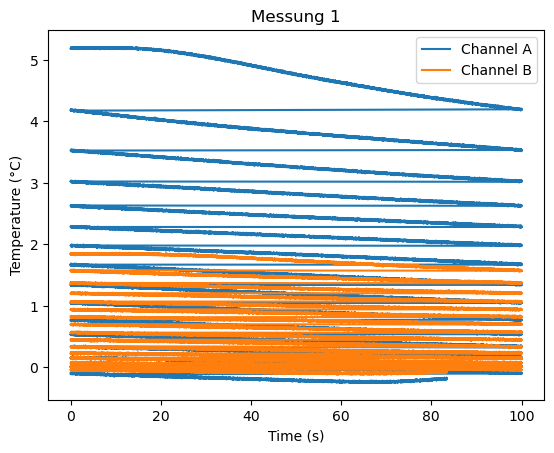

In [13]:
# plot messung_1
plot_data(messung_1, 'Messung 1')